Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
import warnings
warnings.filterwarnings('ignore')

Load the Data

In [10]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [215]:
df = pd.read_csv('data.csv')

In [122]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [123]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [124]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

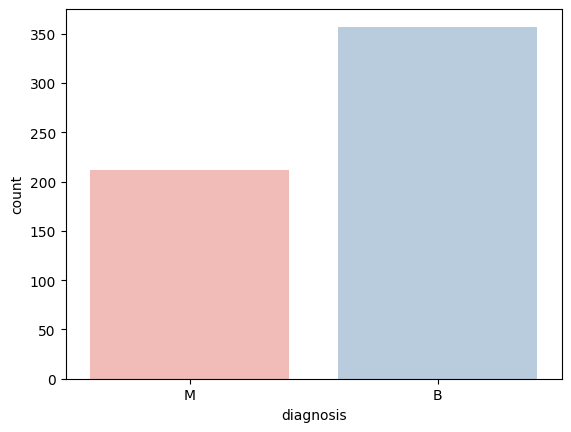

In [125]:
sns.countplot(x='diagnosis', data=df, palette='Pastel1', orient='v')





Next, we'll proceed with data cleaning and preparation.

In [216]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [217]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [127]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [128]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [129]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

radius_mean , perimeter _mean, area_mean have a high correlation with malignant tumor

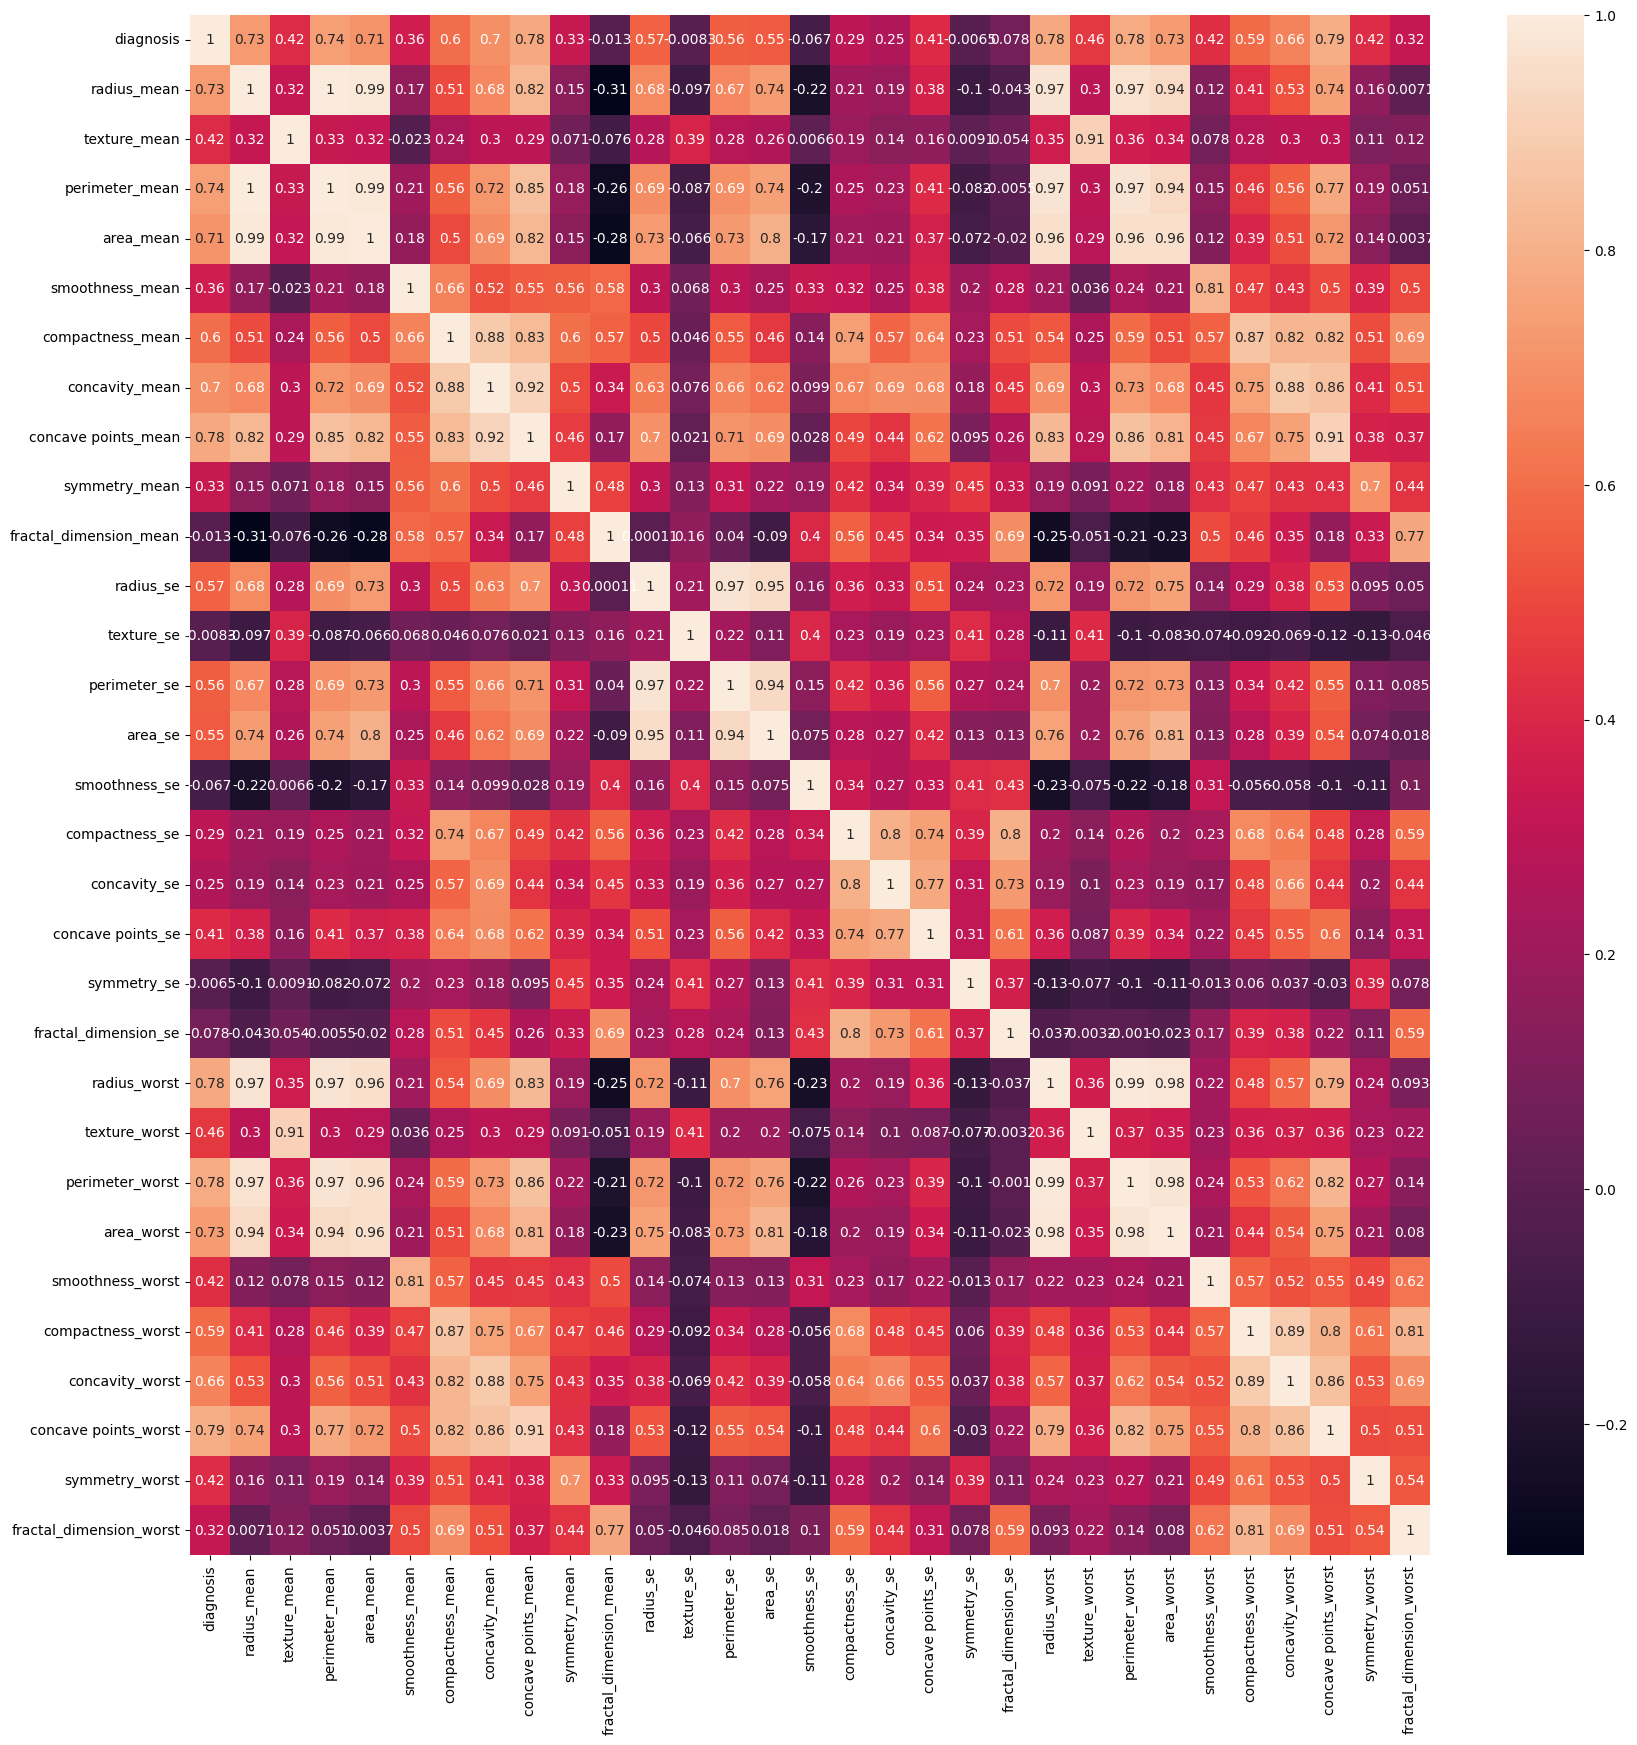

In [130]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()


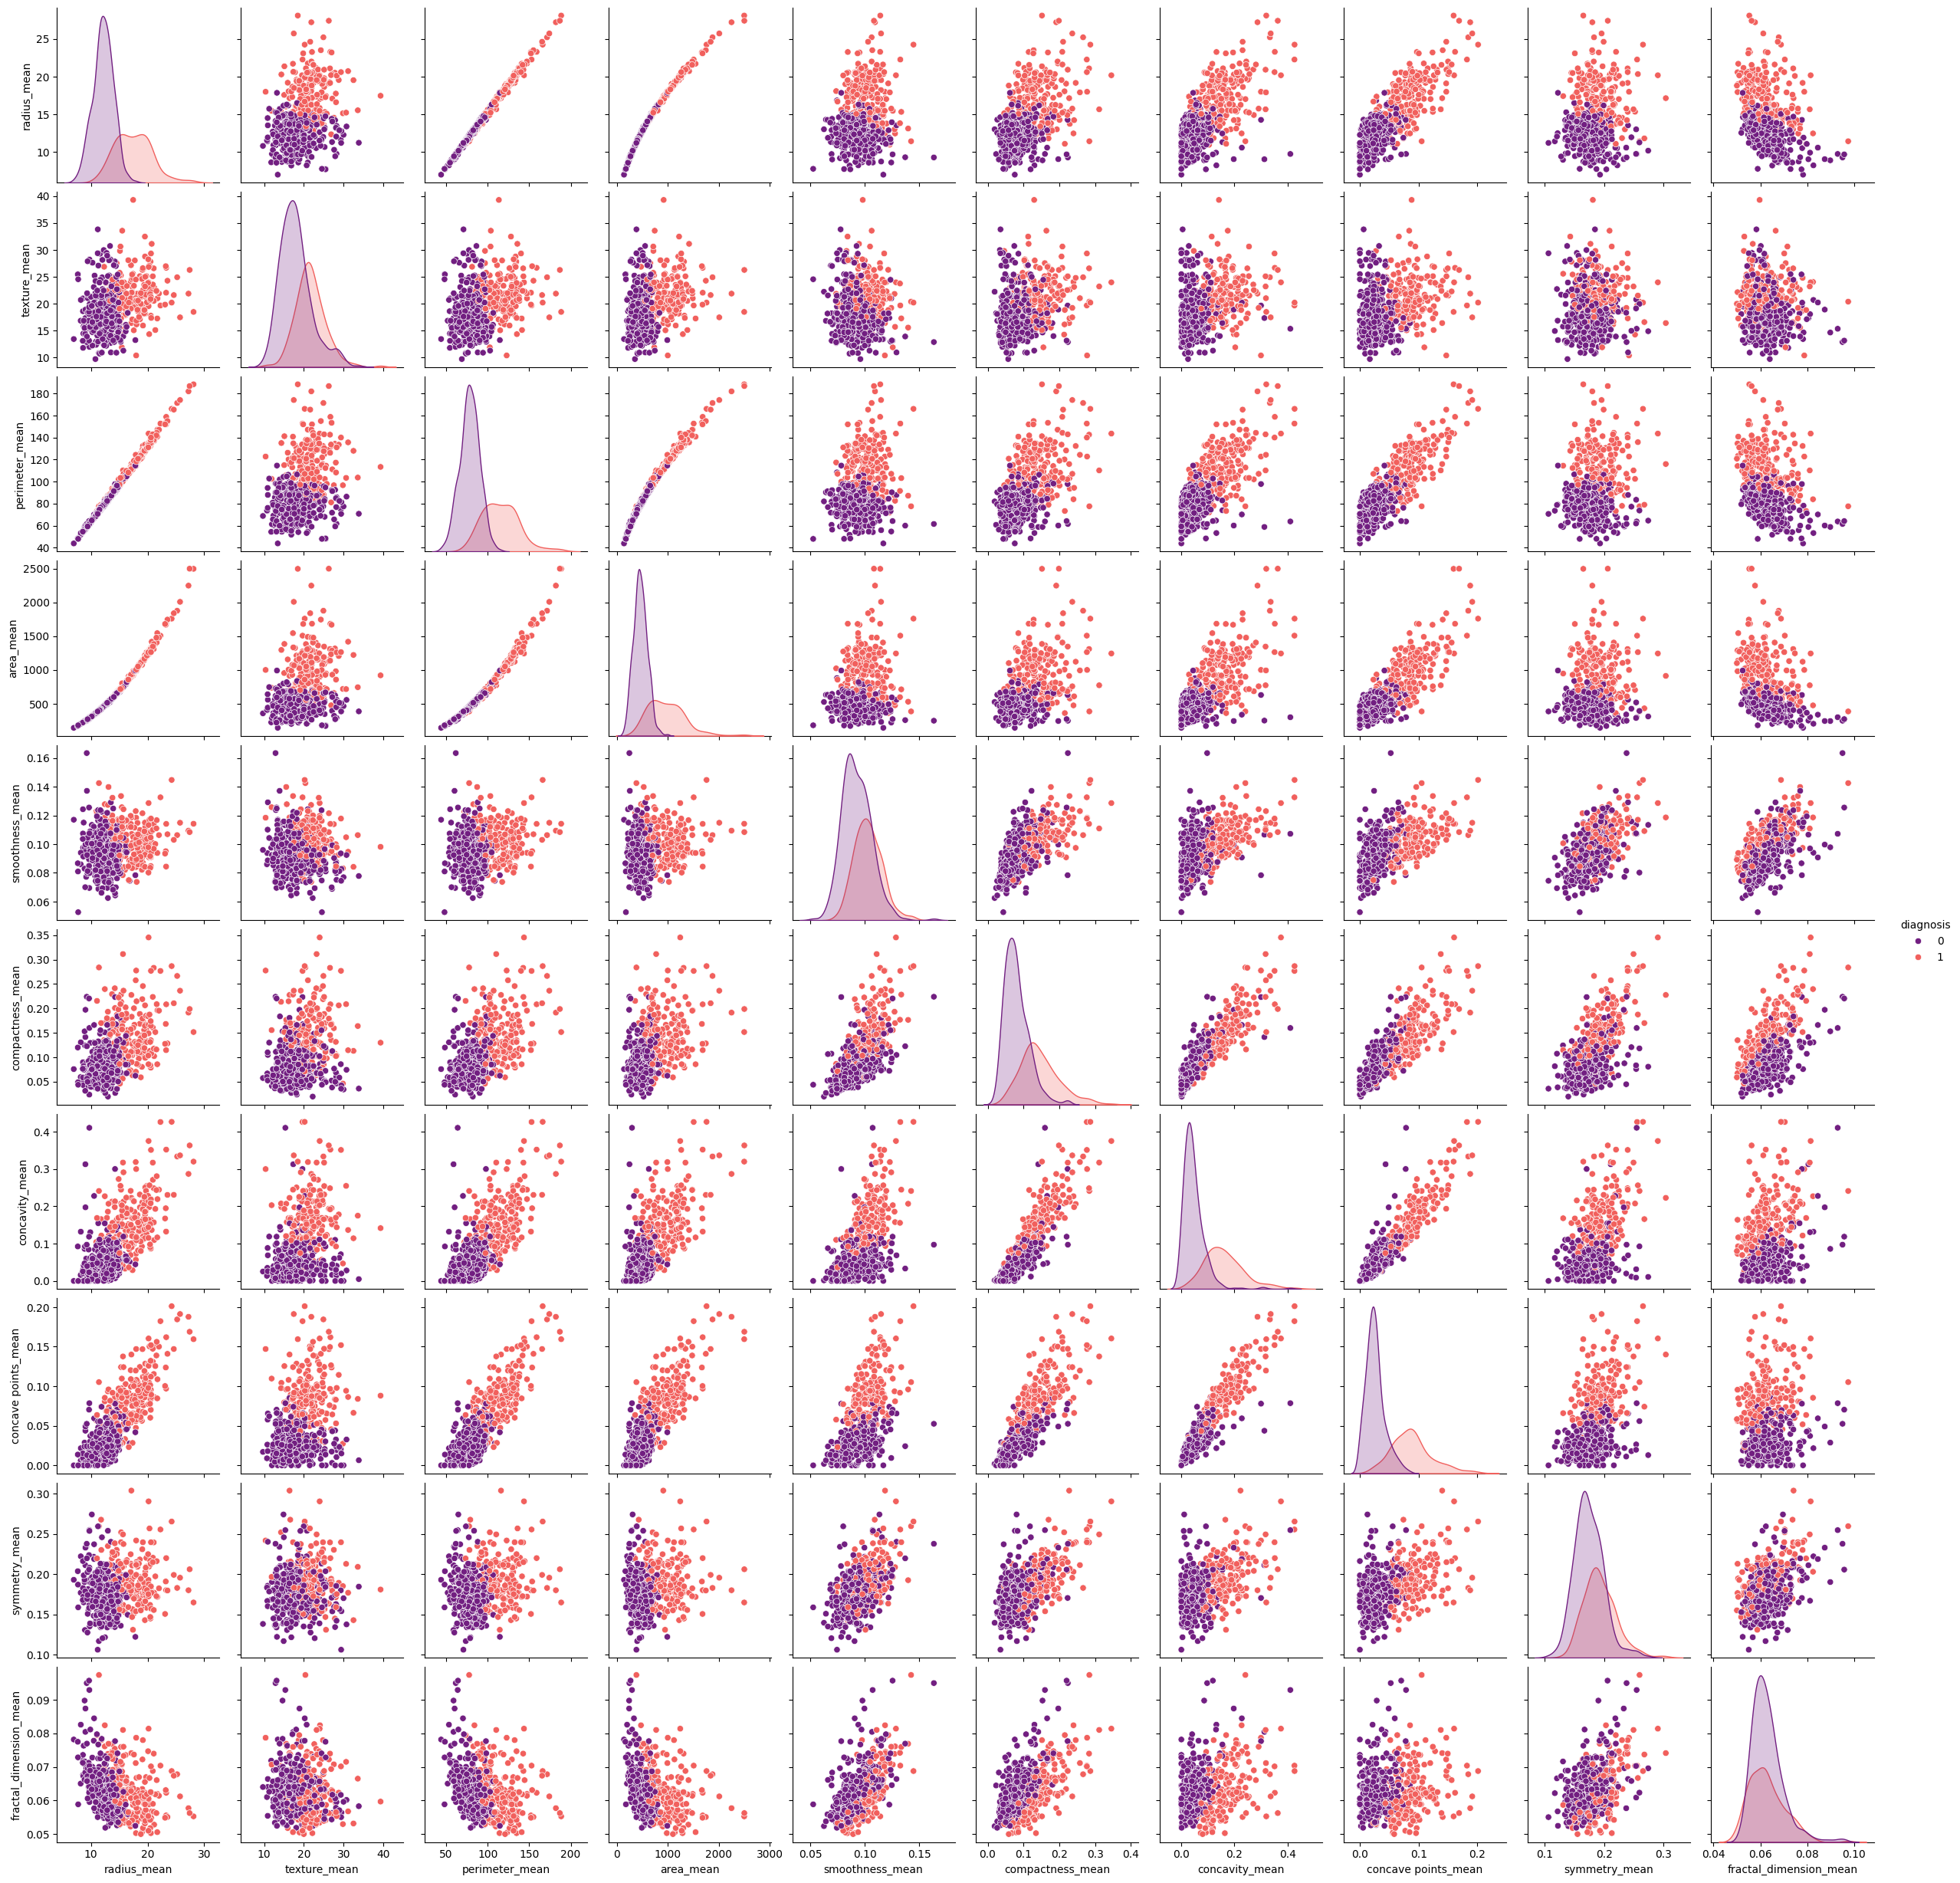

In [131]:
# We generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

pairplot_df = df[cols]
sns.pairplot(pairplot_df, hue='diagnosis', palette='magma')


The nearly linear relationships observed among the radius, perimeter, and area attributes suggest the likelihood of multicollinearity between these variables, indicating strong linear associations. Similarly, the concavity, concave_points, and compactness attributes also potentially indicate multicollinearity. Multicollinearity poses a challenge as it diminishes the significance of independent variables. To address this issue, we can employ techniques such as Partial Least Squares Regression (PLS) or Principal Components Analysis (PCA), which reduce the number of predictors to a smaller set of independent components that are uncorrelated.

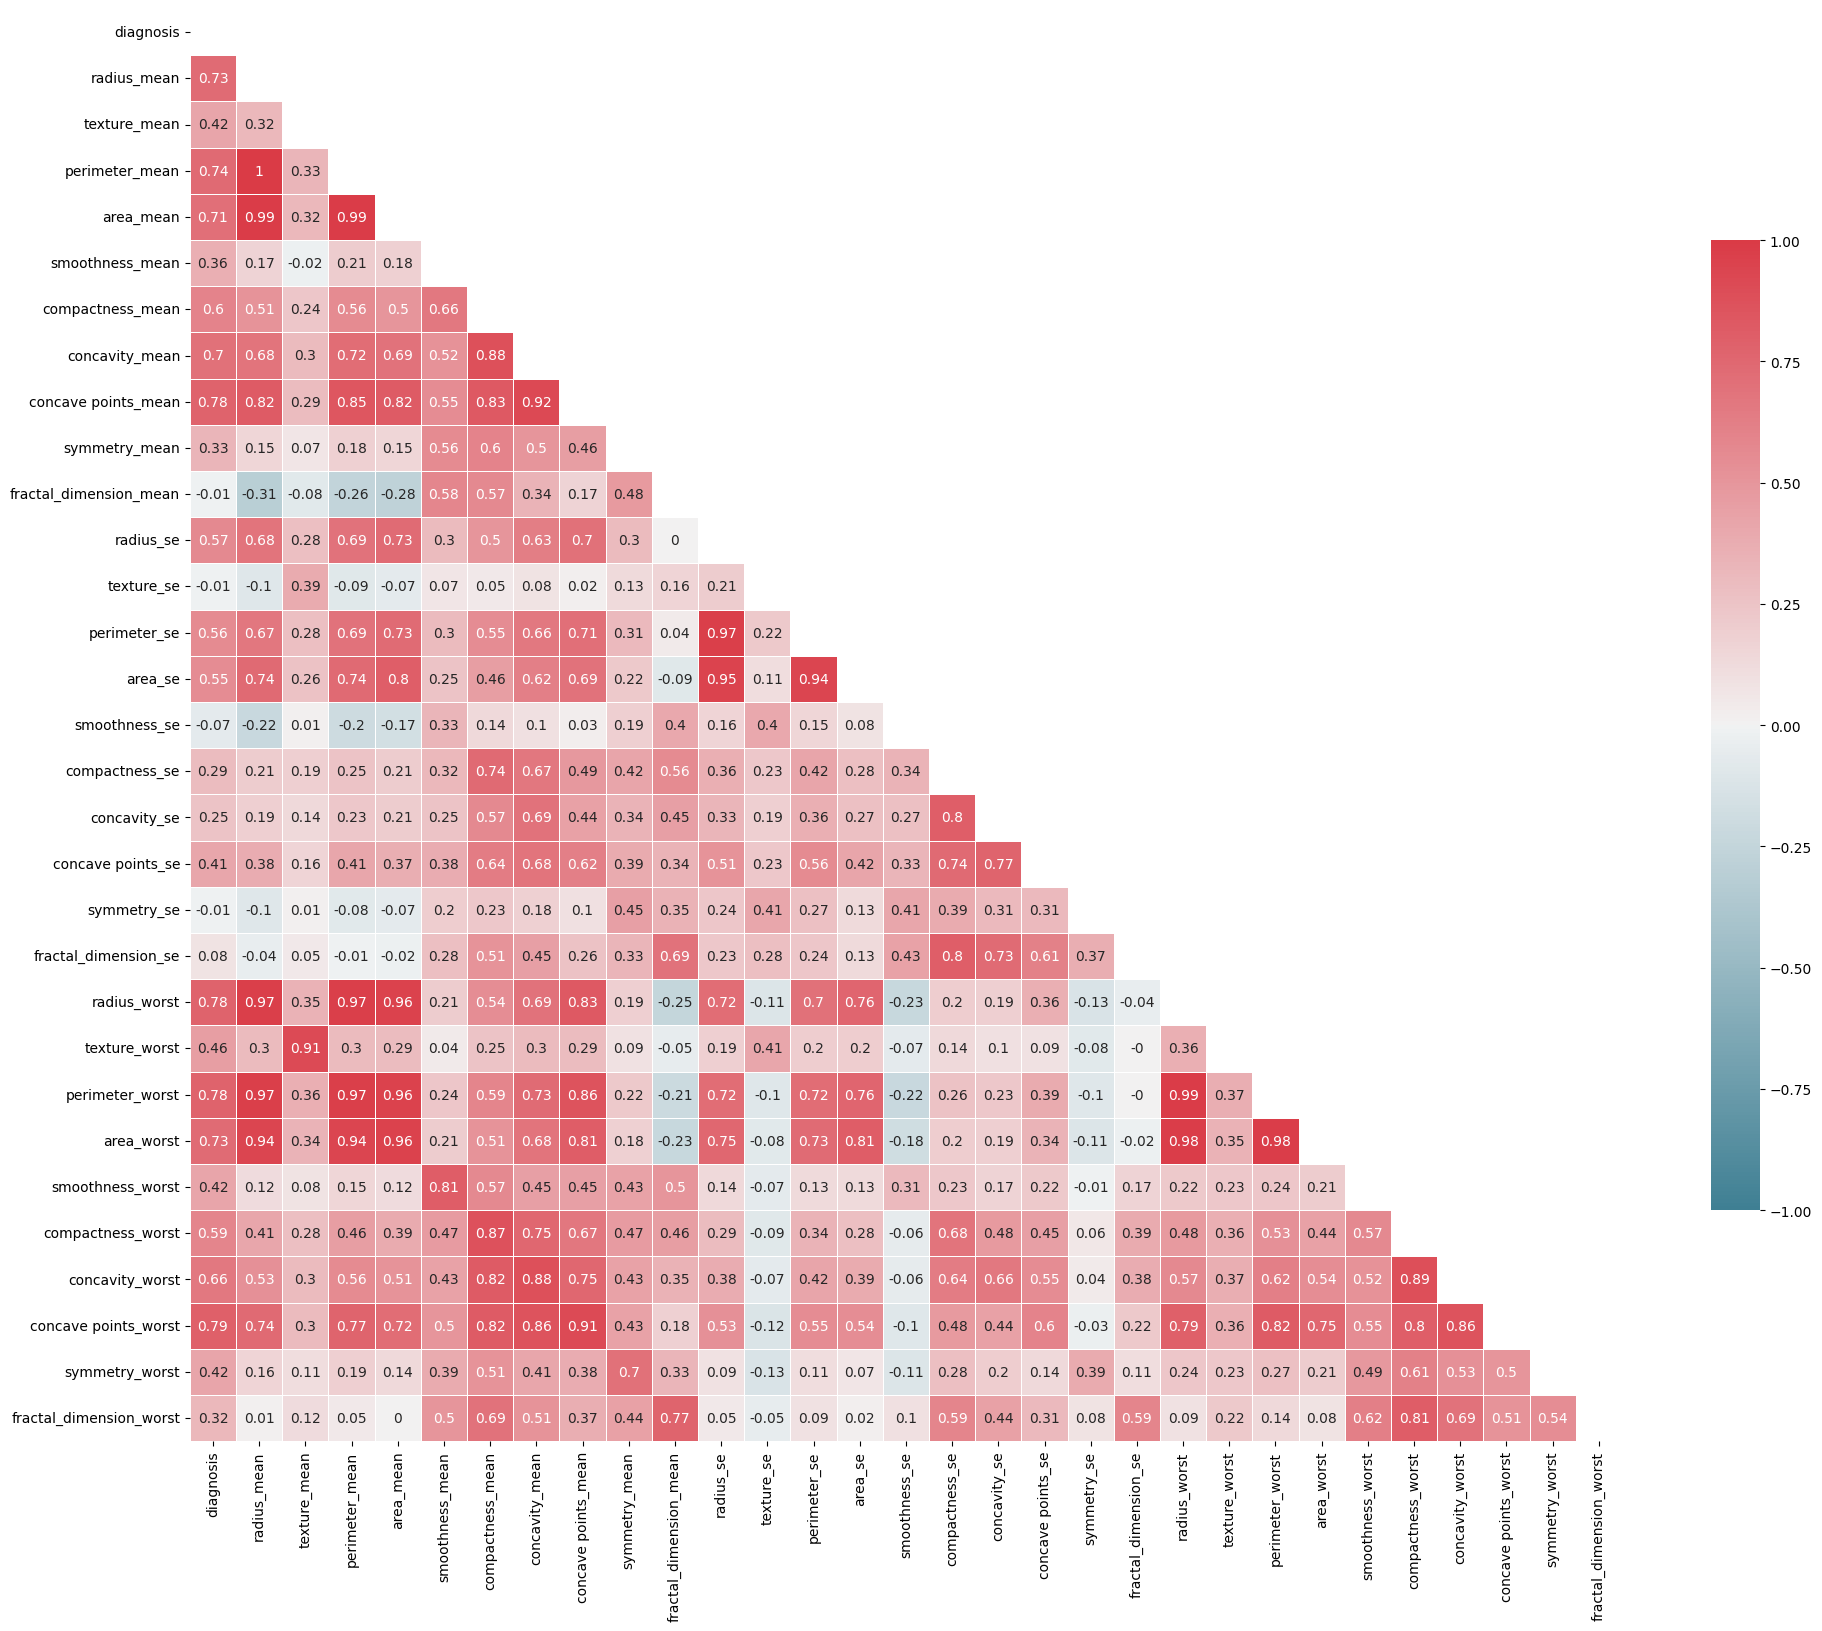

In [132]:
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()
plt.show()




We notice that some columns convey very similar information due to their high correlations. For example, 'radius_mean' is highly correlated with 'perimeter_mean' and 'area_mean'. Similarly, there's a strong correlation between attributes like 'compactness', 'concavity', and 'concave points'. Hence, to avoid redundancy and multicollinearity issues, it's better to choose one representative attribute from each group.

In [135]:
# Drop all columns related to the "worst" attributes
worst_cols = [col for col in df.columns if 'worst' in col]
df.drop(worst_cols, axis=1, inplace=True)

# Drop all columns related to the "perimeter" and "area" attributes
perimeter_area_cols = [col for col in df.columns if 'perimeter' in col or 'area' in col]
df.drop(perimeter_area_cols, axis=1, inplace=True)

# Drop all columns related to the "concavity" and "concave points" attributes
concavity_points_cols = [col for col in df.columns if 'concavity' in col or 'concave points' in col]
df.drop(concavity_points_cols, axis=1, inplace=True)

# Verify remaining columns
df.columns



Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

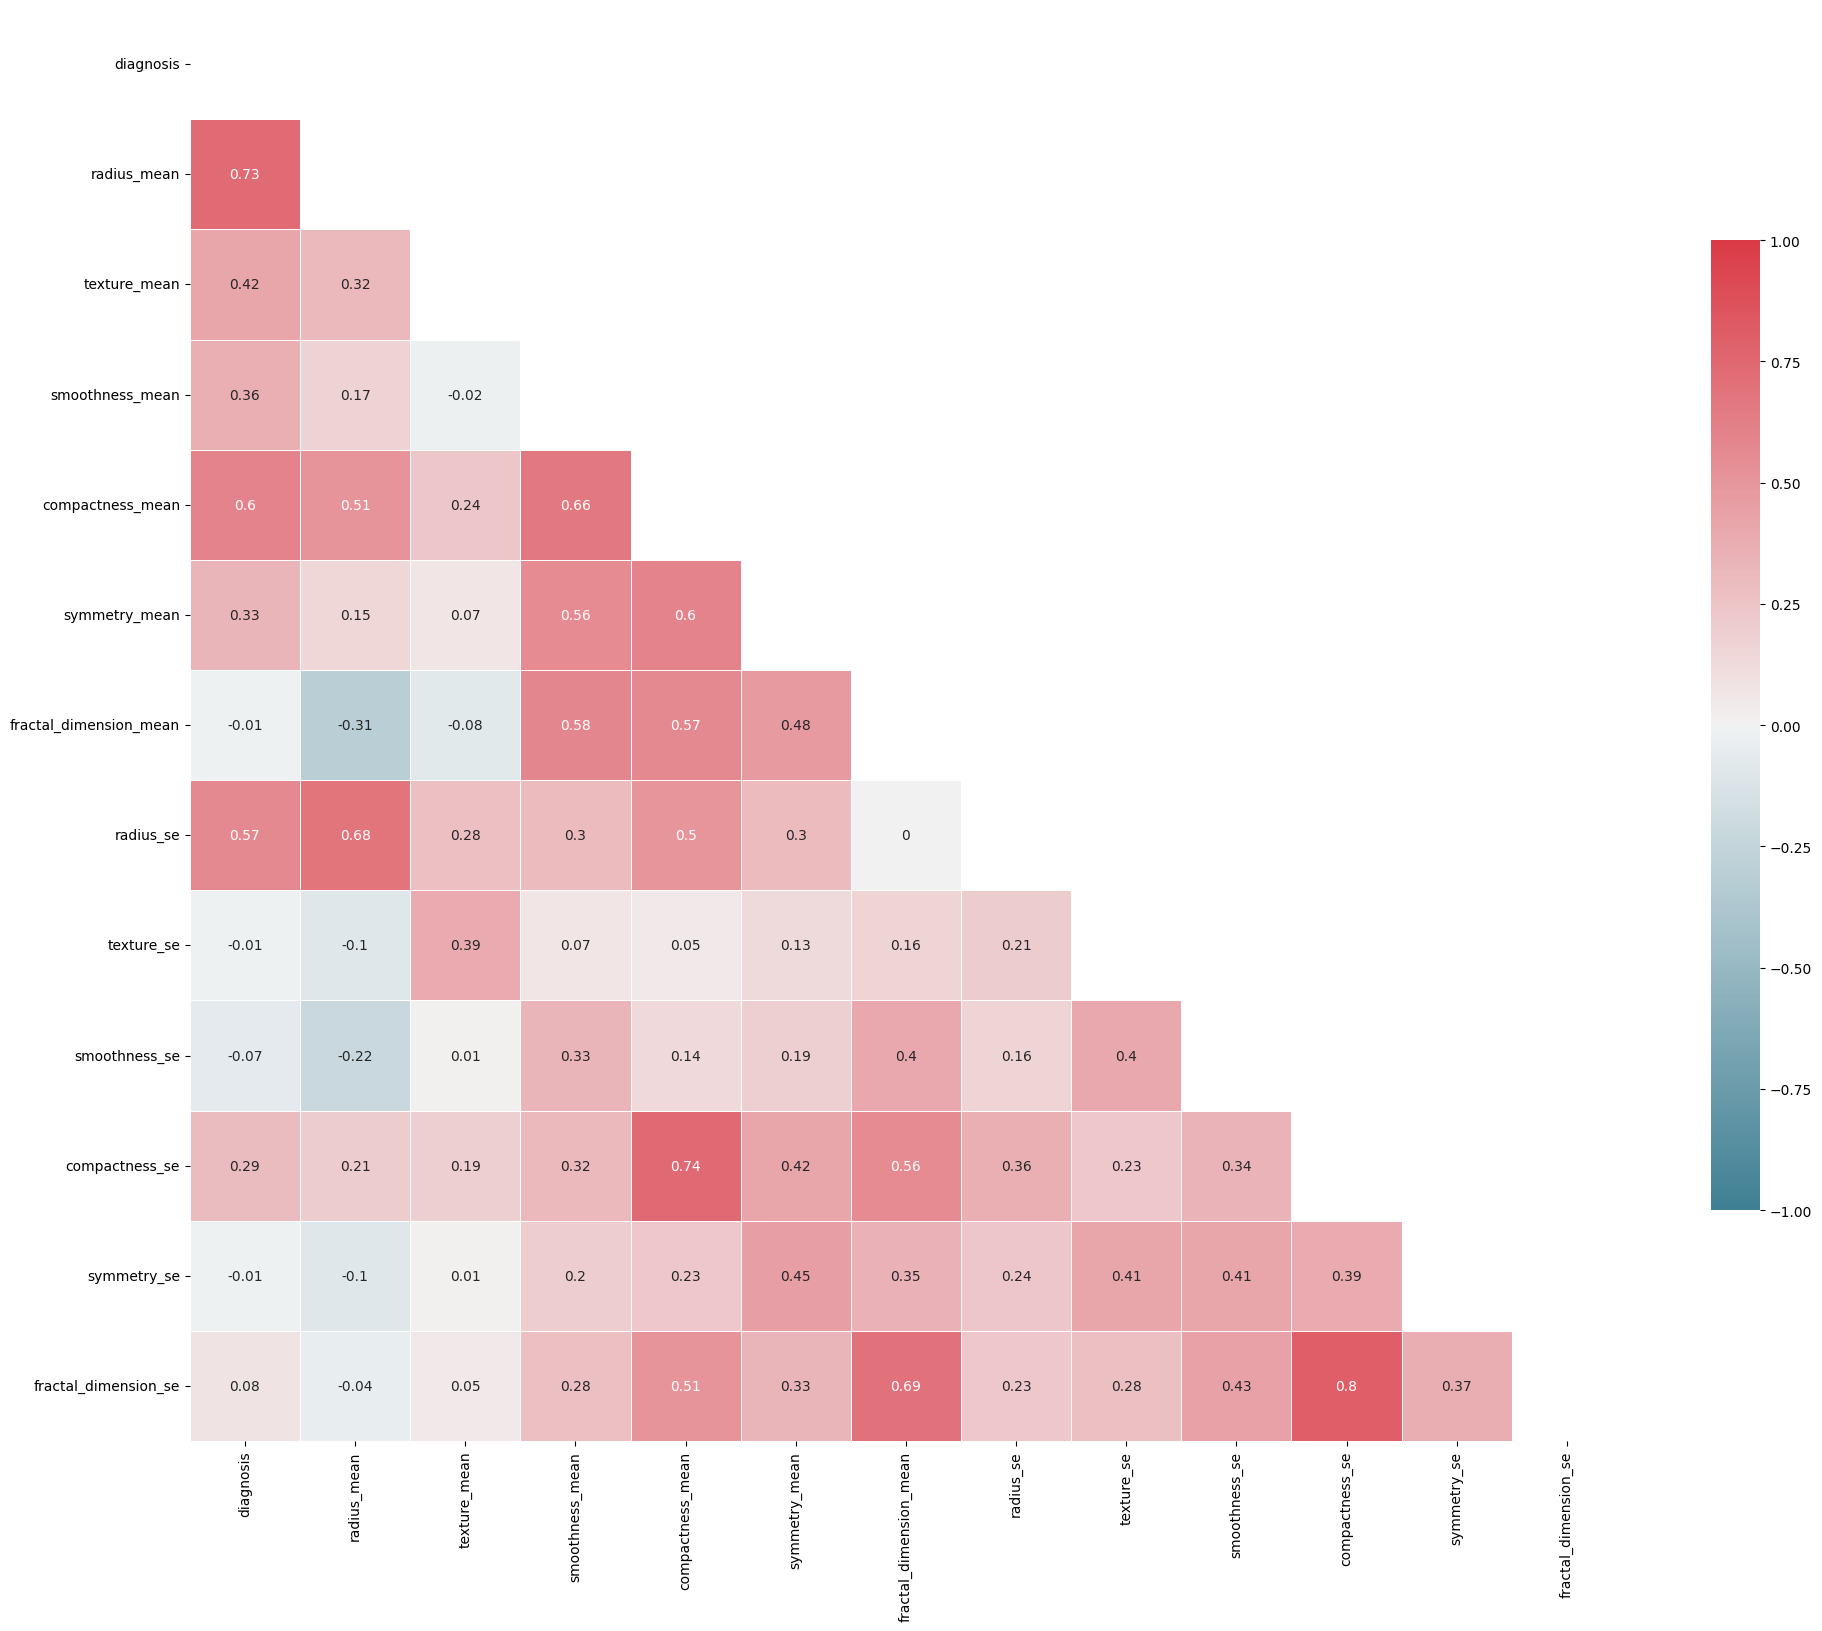

In [136]:
# Generate the correlation matrix for the modified DataFrame
corr = df.corr().round(2)

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size and draw the heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()


Building Model

In [137]:
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

Feature Scaling

In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)




Analyzing different models to determine the optimal one.

Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()

model1 = classifier1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)






In [180]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, prediction1)
conf_matrix




array([[110,   5],
       [  2,  54]])

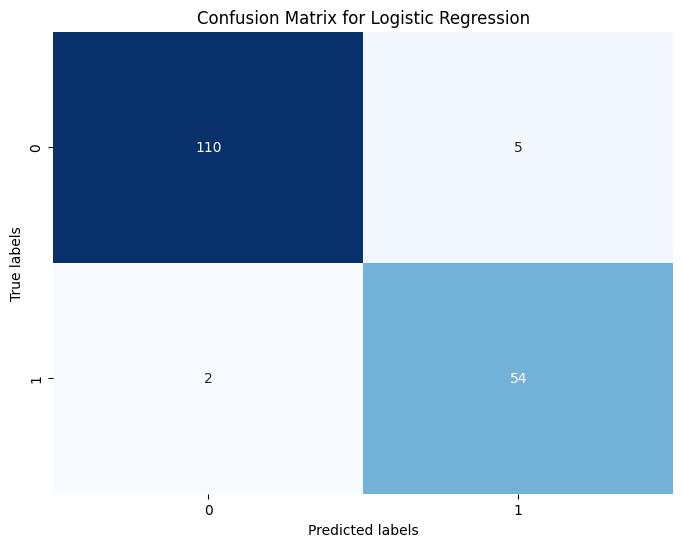

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix based on the true labels (y_test) and predicted labels (prediction3)
confusion = confusion_matrix(y_test, prediction1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()




In [221]:
TP = conf_matrix[0][0]
TN = conf_matrix[1][1]
FN = conf_matrix[1][0]
FP = conf_matrix[0][1]
print('Testing Accuracy:', (TP + TN) / (TP + TN + FN + FP))



Testing Accuracy: 0.9590643274853801


In [183]:
from sklearn.metrics import accuracy_score

In [211]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, prediction1))

Accuracy of Logistic Regression: 0.9590643274853801


Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree Classifier on the training data
model2 = dt_classifier.fit(X_train, y_train)

# Make predictions on the test data using the trained model
prediction2 = model2.predict(X_test)

# Calculate the confusion matrix based on the true labels (y_test) and predicted labels (prediction2)
conf_matrix2 = confusion_matrix(y_test, prediction2)



In [186]:
conf_matrix2

array([[105,  10],
       [  5,  51]])

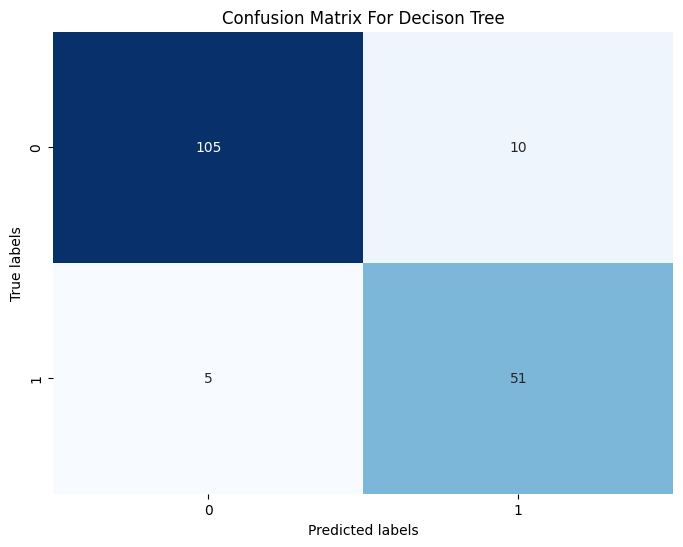

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix based on the true labels (y_test) and predicted labels (prediction3)
confusion = confusion_matrix(y_test, prediction2)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix For Decison Tree')
plt.show()





In [210]:
print("Accuracy of Decision Tree:", accuracy_score(y_test, prediction2))

Accuracy of Decision Tree: 0.9122807017543859


Random Forest

In [230]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Train the Random Forest Classifier on the training data
model3 = rf_classifier.fit(X_train, y_train)

# Make predictions on the test data using the trained model
prediction3 = model3.predict(X_test)

# Calculate the confusion matrix based on the true labels (y_test) and predicted labels (prediction3)
conf_matrix3 = confusion_matrix(y_test, prediction3)



In [231]:
print("Accuracy of Random Forest:", accuracy_score(y_test, prediction3))

Accuracy of Random Forest: 0.9298245614035088


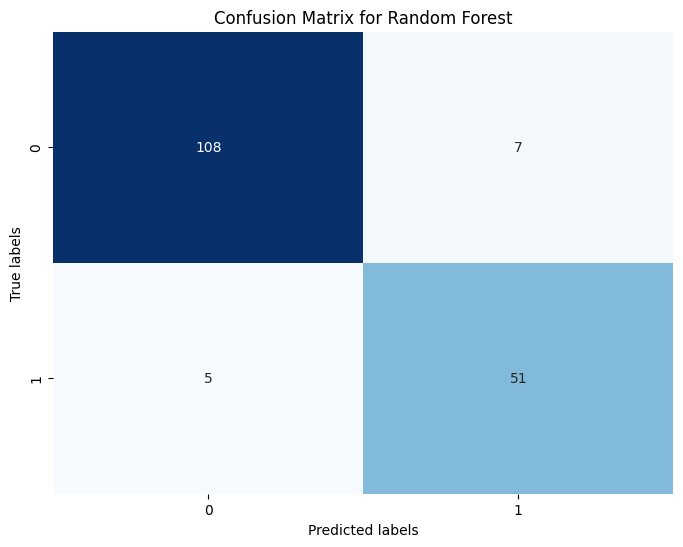

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix based on the true labels (y_test) and predicted labels (prediction3)
confusion = confusion_matrix(y_test, prediction3)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [192]:
from sklearn.metrics import classification_report

report1 = classification_report(y_test, prediction1)
print("Classification Report for Model 1 (Logistic Regression):\n", report1)

report2 = classification_report(y_test, prediction2)
print("\nClassification Report for Model 2 (Decision Tree Classifier):\n", report2)


Classification Report for Model 1 (Logistic Regression):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171


Classification Report for Model 2 (Decision Tree Classifier):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       115
           1       0.84      0.91      0.87        56

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.92      0.91      0.91       171



In [249]:
from sklearn.metrics import classification_report

# Generate a classification report based on the true labels (y_test) and predicted labels (prediction3)
report1 = classification_report(y_test, prediction1)
report2 = classification_report(y_test, prediction2)
report3 = classification_report(y_test, prediction3)

# Print the classification report
print(report1, report2, report3)


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       115
           1       0.84      0.91      0.87        56

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.90       171
weighted avg       0.92      0.91      0.91       171
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       115
           1       0.88      0.91      0.89        56

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



K Nearest Neighbor (K NN)



Support Vector Machine



Naive Bayes

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [193]:
classifiers = []

classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('NB', GaussianNB()))
classifiers.append(('SVM', SVC()))


In [194]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [200]:
accuracy_results = []
classifier_names = []

for classifier_name, classifier in classifiers:
    kfold = KFold(n_splits=10)
    cv_accuracy = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')
    accuracy_results.append(cv_accuracy)
    classifier_names.append(classifier_name)
    
    avg_accuracy = cv_accuracy.mean()
    std_dev_accuracy = cv_accuracy.std()
    msg = '%s - Mean: %f, Standard Deviation: %f' % (classifier_name, avg_accuracy, std_dev_accuracy)
    print(msg)



KNN - Mean: 0.909551, Standard Deviation: 0.040622
NB - Mean: 0.902115, Standard Deviation: 0.032342
SVM - Mean: 0.927308, Standard Deviation: 0.037677


In [207]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, svm_predictions)
report = classification_report(y_test, svm_predictions)
confusion = confusion_matrix(y_test, svm_predictions)

print("Accuracy of SVM:", accuracy)




Accuracy of SVM: 0.9649122807017544


In [222]:
print("Classification Report for SVM:\n", report)
print("Confusion Matrix:\n", confusion)

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
 [[112   3]
 [  3  53]]


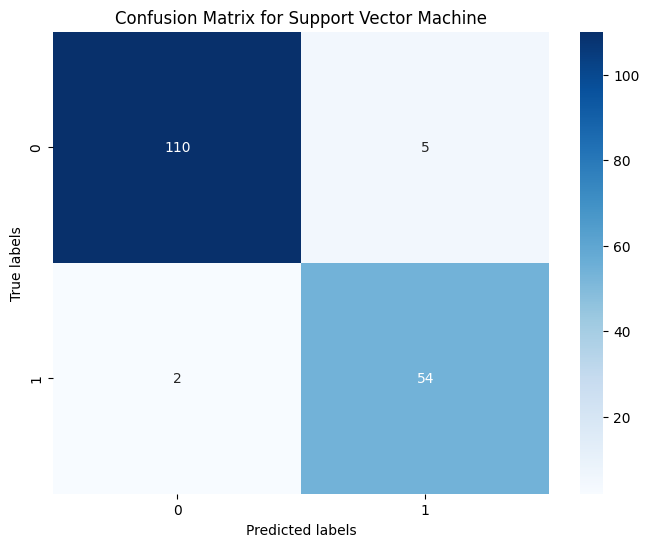

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Support Vector Machine")
plt.show()




SVM has shown the highest accuracy at 96.4%, indicating that the model is predicting test data with 96% accuracy. Among the predictions, 112 cases were accurately identified as positive (TP), while 53 were correctly identified as negative (TN). There were 3 instances where positive cases were incorrectly labeled as negative (FN), and 3 instances where negative cases were mistakenly labeled as positive (FP).